In [94]:
import cv2 as cv
import numpy as np 
import webcolors
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from collections import Counter
# from scipy.spatial import KDTree
# from webcolors import (
#     css3_hex_to_names,
#     hex_to_rgb,
# )

In [95]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [96]:
image_name = r"images/a.jpg"
raw_image = cv.imread(image_name)
img  = cv.resize(raw_image,(900,600),interpolation = cv.INTER_AREA)

In [97]:
img = img.reshape(img.shape[0] * img.shape[1],3)
img.shape

(540000, 3)

In [98]:
img

array([[216, 200, 193],
       [216, 200, 193],
       [216, 200, 193],
       ...,
       [ 99,  60,  12],
       [ 99,  59,  11],
       [ 99,  59,  11]], dtype=uint8)

In [99]:
clf =KMeans(n_clusters=5)
color_labels = clf.fit_predict(img)
center_color = clf.cluster_centers_

In [100]:
color_labels

array([0, 0, 0, ..., 2, 2, 2])

In [101]:
center_color

array([[208.3102093 , 194.86865707, 190.28948801],
       [115.12599015,  87.2061594 ,  62.96988278],
       [ 58.53182774,  41.76938579,  32.29981162],
       [154.75366781, 172.5254181 , 212.31636781],
       [166.23601377, 145.95725747, 136.76171923]])

In [102]:
count = Counter(color_labels)
count

Counter({0: 259056, 4: 130199, 1: 72078, 3: 33049, 2: 45618})

In [103]:
ordered_colors = [center_color[i] for i in count.keys() ]
ordered_colors


[array([208.3102093 , 194.86865707, 190.28948801]),
 array([166.23601377, 145.95725747, 136.76171923]),
 array([115.12599015,  87.2061594 ,  62.96988278]),
 array([154.75366781, 172.5254181 , 212.31636781]),
 array([58.53182774, 41.76938579, 32.29981162])]

In [104]:
hex_color = [rgb_to_hex(ordered_colors[i]) for i in count.keys()]
hex_color

['#d0c2be', '#3a2920', '#a69188', '#9aacd4', '#73573e']

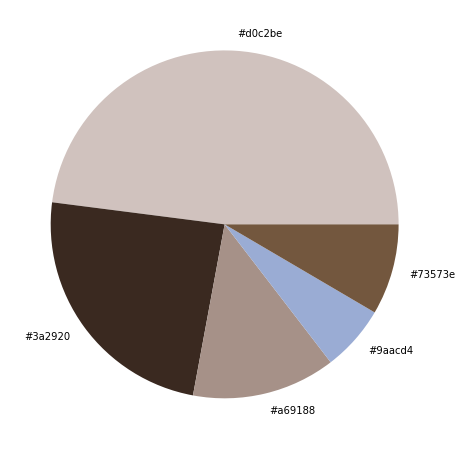

In [105]:
plt.figure(figsize=(12,8))
plt.pie(count.values(),labels = hex_color,colors = hex_color)
plt.savefig(f'{image_name[:5]}-analysis.png')

In [106]:
hex_color


['#d0c2be', '#3a2920', '#a69188', '#9aacd4', '#73573e']

In [107]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [108]:
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = css3_hex_to_names
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [109]:
color_names= [convert_rgb_to_names(hex_to_rgb(hex_color[i])) for i in range(len(hex_color))]


In [110]:
color_names

['silver', 'darkslategrey', 'rosybrown', 'lightsteelblue', 'darkolivegreen']